## **Importing dataset and posters**

In [ ]:
import requests
import pandas as pd
import os
from google.colab import drive
from tqdm import tqdm  # Progress bar for downloads

# Mount Google Drive
drive.mount('/content/drive')

# Define paths for dataset storage
drive_folder = "/content/drive/My Drive/"
movies_file = os.path.join(drive_folder, "tmdb_5000_movies.csv")
credits_file = os.path.join(drive_folder, "tmdb_5000_credits.csv")
posters_folder = os.path.join(drive_folder, "posters")

# Ensure posters directory exists
os.makedirs(posters_folder, exist_ok=True)

# Your TMDb API key (Replace with your actual API key)
TMDB_API_KEY = "1d85fa855f879e4032499bad3ba96d14"

# Load datasets
movies_df = pd.read_csv(movies_file)
credits_df = pd.read_csv(credits_file)

# Rename 'id' to 'movie_id' in the movies dataset
movies_df.rename(columns={"id": "movie_id"}, inplace=True)

# Convert movie_id to integer for consistency
movies_df["movie_id"] = movies_df["movie_id"].astype(int)
credits_df["movie_id"] = credits_df["movie_id"].astype(int)

# Merge both datasets on 'movie_id'
df = movies_df.merge(credits_df, on="movie_id", how="left")

# Function to fetch poster URL using TMDb movie_id
def get_tmdb_poster(movie_id):
    url = f"https://api.themoviedb.org/3/movie/{movie_id}?api_key={TMDB_API_KEY}"
    response = requests.get(url).json()
    if "poster_path" in response and response["poster_path"]:
        return f"https://image.tmdb.org/t/p/original{response['poster_path']}"
    return None

# Function to download and save poster images
def download_poster(movie_id, poster_url):
    if poster_url:
        image_path = os.path.join(posters_folder, f"{movie_id}.jpg")
        response = requests.get(poster_url, stream=True)
        if response.status_code == 200:
            with open(image_path, "wb") as file:
                for chunk in response.iter_content(1024):
                    file.write(chunk)
            return image_path
    return None

# Add Poster_URL and Poster_Path columns if missing
if "Poster_URL" not in df.columns:
    df["Poster_URL"] = None
if "Poster_Path" not in df.columns:
    df["Poster_Path"] = None

# Fetch posters and download images
for index, row in tqdm(df.iterrows(), total=df.shape[0]):
    if pd.isna(row["Poster_URL"]):
        poster_url = get_tmdb_poster(row["movie_id"])
        df.at[index, "Poster_URL"] = poster_url
        if poster_url:
            df.at[index, "Poster_Path"] = download_poster(row["movie_id"], poster_url)

# Save updated dataset
updated_file = os.path.join(drive_folder, "tmdb_5000_movies_updated.csv")
df.to_csv(updated_file, index=False)

print(f"✅ Dataset updated and saved at: {updated_file}")
print(f"✅ Posters saved in: {posters_folder}")


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import os
from google.colab import drive

def load_data():
    # Mount Google Drive
    drive.mount('/content/drive')

    # Define file paths
    credits_path = "/content/drive/MyDrive/tmdb_5000_credits.csv"
    movies_path = "/content/drive/MyDrive/tmdb_5000_movies.csv"
    updated_path = "/content/drive/MyDrive/tmdb_5000_movies_updated.csv"
    # Verify if files exist
    if not (os.path.exists(credits_path) and os.path.exists(movies_path)):
        raise FileNotFoundError("Files not found. Check Google Drive paths!")

    print("✅ Files found! Loading data...")

    # Load datasets
    credits_df = pd.read_csv(credits_path)
    movies_df = pd.read_csv(movies_path)
    updated_df = pd.read_csv(updated_path)

    print("✅ Data loaded successfully!")

    return credits_df, movies_df, updated_df

    # Merge datasets on 'id' and 'movie_id'
    movies_df = movies_df.merge(credits_df, left_on='id', right_on='movie_id', how='left')

    return movies_df


**MISSING VALUES ANALYSIS**

🔍 Missing Values:
 homepage        3091
tagline          844
Poster_URL        26
Poster_Path       26
overview           3
runtime            2
release_date       1
dtype: int64


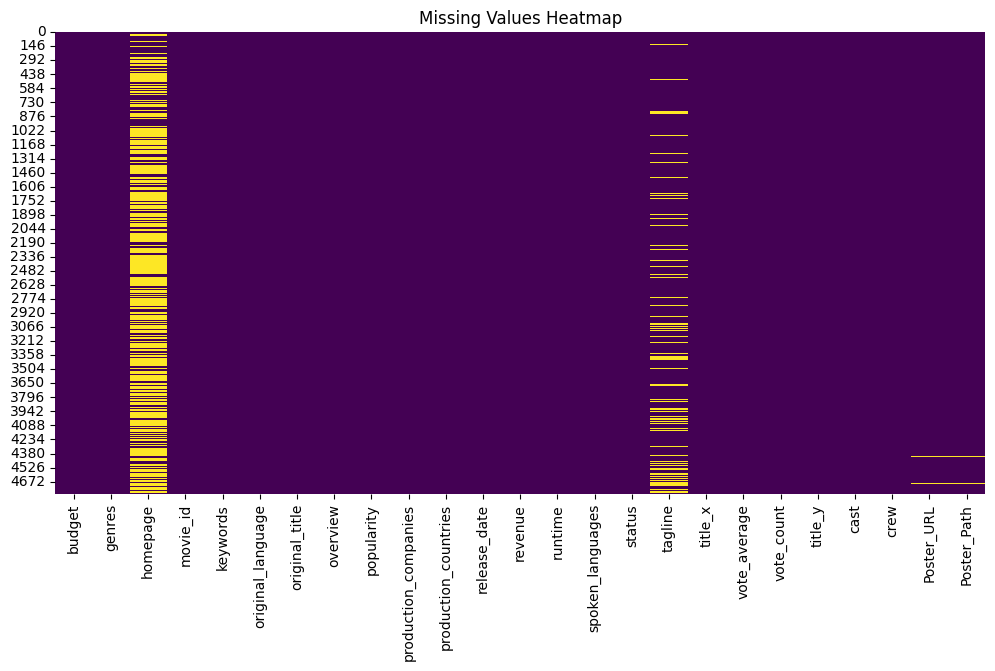

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset (Modify path if needed)
df = pd.read_csv("/content/drive/My Drive/tmdb_5000_movies_updated.csv")

# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("🔍 Missing Values:\n", missing_values)

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


**GENRE ANALYSIS**

<ipython-input-10-71117c714436>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="coolwarm")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


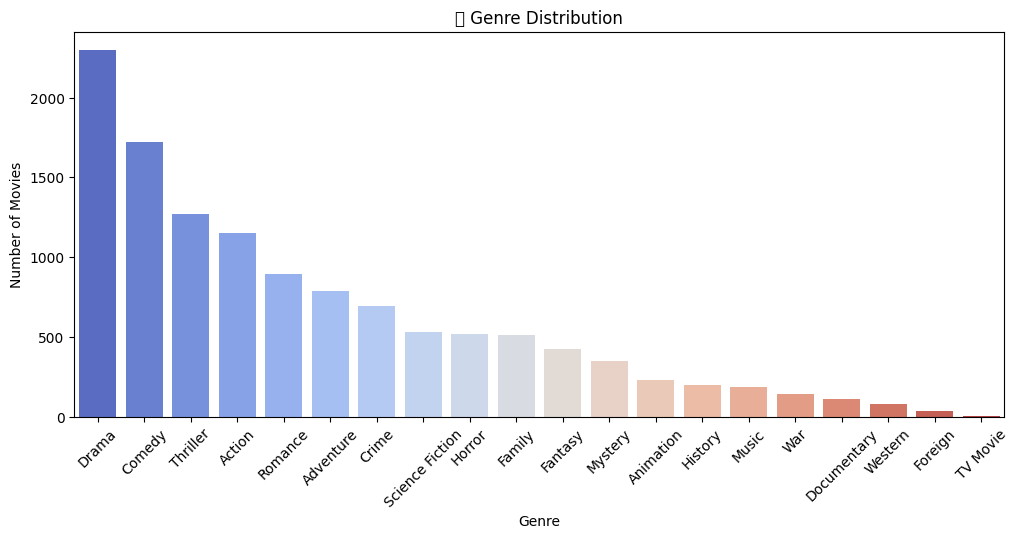

In [10]:
import ast  # To parse genre lists

# Convert genres column from string to list
df["genres"] = df["genres"].fillna("[]").apply(ast.literal_eval)

# Extract all genre names
all_genres = [genre["name"] for genres in df["genres"] for genre in genres]
genre_counts = pd.Series(all_genres).value_counts()

# Plot genre distribution
plt.figure(figsize=(12, 5))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.title("🎭 Genre Distribution")
plt.show()


**BUDGET AND REVENUE ANALYSIS**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


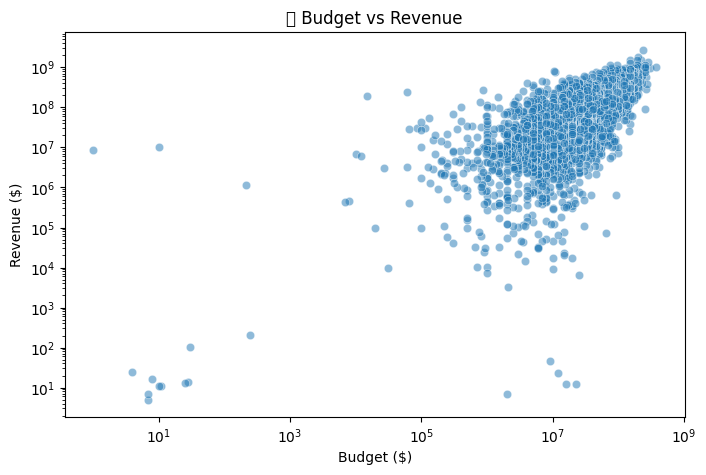

The 'title' column is missing or renamed. Available columns: Index(['budget', 'genres', 'homepage', 'movie_id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline',
       'title_x', 'vote_average', 'vote_count', 'title_y', 'cast', 'crew',
       'Poster_URL', 'Poster_Path', 'profit'],
      dtype='object')
🔍 High-budget movies with losses:
                    original_title       budget      revenue       profit
13                The Lone Ranger  255000000.0   89289910.0 -165710090.0
73                  Evan Almighty  175000000.0  173000000.0   -2000000.0
84                       47 Ronin  175000000.0  150962475.0  -24037525.0
141               Mars Needs Moms  150000000.0   38992758.0 -111007242.0
142                  Flushed Away  149000000.0   64459316.0  -84540684.0
...                           ...          ...

In [12]:
# Convert budget & revenue to numeric, replacing 0 with NaN
df["budget"] = df["budget"].replace(0, np.nan)
df["revenue"] = df["revenue"].replace(0, np.nan)

# Scatter plot: Budget vs Revenue
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="budget", y="revenue", alpha=0.5)
plt.xlabel("Budget ($)")
plt.ylabel("Revenue ($)")
plt.title("💰 Budget vs Revenue")
plt.xscale("log")
plt.yscale("log")
plt.show()

# Identify outliers (movies with a high budget but low revenue)
df["profit"] = df["revenue"] - df["budget"]
outliers = df[df["profit"] < 0]  # Movies that made a loss
# Check the column names in the DataFrame
if 'title' not in df.columns:
    print("The 'title' column is missing or renamed. Available columns:", df.columns)

# If 'title' is available, proceed with the following
outliers = df[df["profit"] < 0]  # Movies that made a loss
print("🔍 High-budget movies with losses:\n", outliers[['original_title', 'budget', 'revenue', 'profit']])



**IMDB SCORE DISTRIBUTION**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


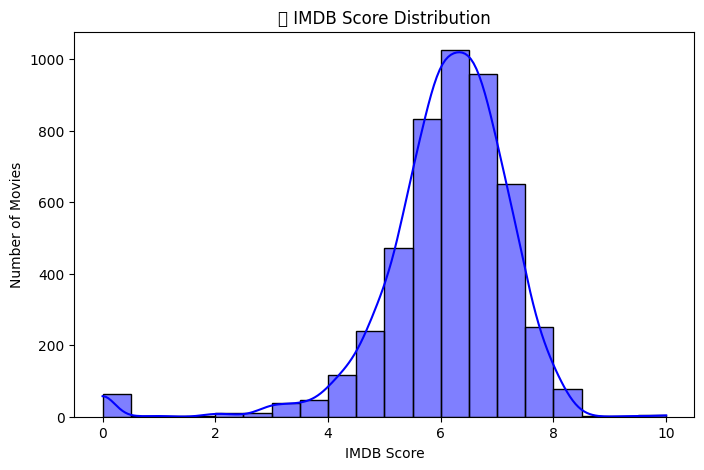

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df["vote_average"], bins=20, kde=True, color="blue")
plt.xlabel("IMDB Score")
plt.ylabel("Number of Movies")
plt.title("⭐ IMDB Score Distribution")
plt.show()


**CORRELATION ANALYSIS**

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


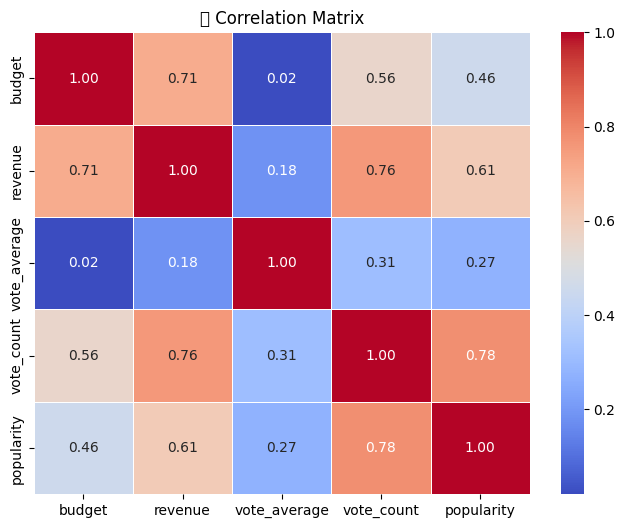

In [14]:
# Select relevant numeric columns
numeric_cols = ["budget", "revenue", "vote_average", "vote_count", "popularity"]
correlation_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("📊 Correlation Matrix")
plt.show()


**Text tokenization**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import nltk
import shutil
import os

# Delete NLTK data folder to remove corrupted files
shutil.rmtree("/root/nltk_data", ignore_errors=True)

# Ensure nltk_data directory exists
os.makedirs("/root/nltk_data", exist_ok=True)

# Reinstall NLTK
!pip install --upgrade nltk

# Re-download necessary datasets
nltk.download("punkt")
nltk.download("stopwords")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
import nltk
nltk.download('punkt_tab')
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")  # Sometimes needed
nltk.download("wordnet")  # If lemmatization is used
nltk.download("omw-1.4")  # For WordNet mappings


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
#!pip uninstall -y nltk
#!pip install --no-cache-dir --upgrade nltk


In [5]:
# Testing tokenization
import nltk
from nltk.tokenize import word_tokenize

text = "Hello! This is a test sentence."
tokens = word_tokenize(text)
print(tokens)  # Expected: ['Hello', '!', 'This', 'is', 'a', 'test', 'sentence', '.']



['Hello', '!', 'This', 'is', 'a', 'test', 'sentence', '.']


In [10]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import os
from PIL import Image

# Download necessary NLTK resources
nltk.download("punkt")
nltk.download("stopwords")

# Load the dataset
df = pd.read_csv("/content/drive/My Drive/tmdb_5000_movies_updated.csv")

#print(df.head(5))

# Define text preprocessing function
def clean_text(text):
    if pd.isna(text):  # Handle missing values
        return ""
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in stopwords.words("english")]  # Remove stopwords
    return " ".join(tokens)  # Return cleaned text

# Apply to text columns
df["overview"] = df["overview"].apply(clean_text)
df["tagline"] = df["tagline"].apply(clean_text)
df["orignal_title"] = df["title_x"].apply(clean_text) # Debugged --> title_x instad of orignal_title

print("✅ Text Cleaning Completed!")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✅ Text Cleaning Completed!


**Image Standardization**

In [11]:
from tqdm import tqdm

# Define path to posters
posters_folder = "/content/drive/My Drive/tmdb_data/posters/"
standardized_folder = "/content/drive/My Drive/tmdb_data/posters_resized/"

# Ensure standardized poster directory exists
os.makedirs(standardized_folder, exist_ok=True)

# Resize images to 256x256
def resize_poster(movie_id):
    input_path = os.path.join(posters_folder, f"{movie_id}.jpg")
    output_path = os.path.join(standardized_folder, f"{movie_id}.jpg")

    if os.path.exists(input_path):
        img = Image.open(input_path)
        img = img.resize((256, 256))  # Resize to 256x256
        img.save(output_path)
        return output_path
    return None

# Apply resizing to all posters
df["Poster_Path_Resized"] = df["movie_id"].apply(resize_poster)

print("✅ Image Standardization Completed!")


✅ Image Standardization Completed!


**Train-Validation-Test Split**

In [14]:
from sklearn.model_selection import train_test_split

# Extract primary genre for stratification
df["primary_genre"] = df["genres"].apply(lambda x: x[0]["name"] if isinstance(x, list) and x else "Unknown")

# First split: Train (70%) and Temp (30%)
train_df, temp_df = train_test_split(df, test_size=0.30, stratify=df["primary_genre"], random_state=42)

# Second split: Validation (15%) and Test (15%) from Temp
val_df, test_df = train_test_split(temp_df, test_size=0.50, stratify=temp_df["primary_genre"], random_state=42)

# Save the splits
train_df.to_csv("/content/drive/My Drive/tmdb_data/train.csv", index=False)
val_df.to_csv("/content/drive/My Drive/tmdb_data/val.csv", index=False)
test_df.to_csv("/content/drive/My Drive/tmdb_data/test.csv", index=False)

print("✅ Data Split Completed!")
print(f"📂 Train Set: {len(train_df)} samples")
print(f"📂 Validation Set: {len(val_df)} samples")
print(f"📂 Test Set: {len(test_df)} samples")


✅ Data Split Completed!
📂 Train Set: 3362 samples
📂 Validation Set: 720 samples
📂 Test Set: 721 samples
